<a target="_blank" href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/03%20-%20Pandas%20-%20Data%20Cleaning/walkthrough/walkthrough_03_EDA.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# <a class="anchor"></a> 1. Exploratory Data Analysis





Now lets get into the Data Analysis per say. This part will extensively rely on the Pandas Dataframes, and functions. Please do not hesitate to refer to last sessions introduction if you don't feel yet comfortable. Throughout this part, you will learn more about the dtypes of data you can find in data frame and manipulate its columns for analysis purposes. 

## <a class="anchor"></a> 1.1. Loading and getting a first look at our Data 


In [65]:
#Let's import pandas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix



The dataset we will use is available under the following url :`'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD'`. This dataset containts the results of restaurant inspections in NYC.

In [66]:
#You should already know what this block of code does. 
restaurants = pd.read_csv('https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD')

#Let's have a look at the data
restaurants.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50103154,PEACOCK GOURMET,Manhattan,2265,1 AVENUE,10035.0,9173785360,American,01/12/2022,Violations were cited in the following area(s).,...,03/09/2022,Smoke-Free Air Act / Initial Inspection,40.796241,-73.935246,111.0,8.0,18800.0,1052961.0,1.016880e+09,MN34
1,50091983,KNICKERBOCKER BAGEL,Brooklyn,367,KNICKERBOCKER AVENUE,11237.0,7187098888,Bagels/Pretzels,10/28/2019,Violations were cited in the following area(s).,...,03/09/2022,Pre-permit (Operational) / Initial Inspection,40.700528,-73.921368,304.0,37.0,43100.0,3074174.0,3.032580e+09,BK77
2,50088363,LOCALS,Queens,190,BEACH 69 STREET,11692.0,3477522728,Coffee/Tea,04/04/2019,Violations were cited in the following area(s).,...,03/09/2022,Pre-permit (Operational) / Initial Inspection,40.589616,-73.797797,414.0,31.0,95400.0,4614931.0,4.159390e+09,QN12
3,50093837,UZ CORNER COFFEE SHOP,Queens,5401,99TH ST,11368.0,7186997626,American,02/14/2020,Violations were cited in the following area(s).,...,03/09/2022,Cycle Inspection / Re-inspection,40.739443,-73.860621,404.0,21.0,44301.0,4047217.0,4.019090e+09,QN25
4,41474224,TIBERIAS,Manhattan,45,EAST 34 STREET,10016.0,2124814222,Jewish/Kosher,07/25/2017,Violations were cited in the following area(s).,...,03/09/2022,Cycle Inspection / Initial Inspection,40.747566,-73.982482,106.0,2.0,7400.0,1017099.0,1.008640e+09,MN17


Let's use the `.describe()` function to get a quick overview of the Data we will be working with.


In [67]:
restaurants.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,3.406000e+05,335359.000000,324912.000000,340282.000000,340282.000000,334521.000000,334529.000000,334529.000000,3.329700e+05,3.397500e+05
mean,4.671883e+07,10673.718209,20.471435,40.105160,-72.805577,247.267807,19.773640,28826.593593,2.497364e+06,2.386870e+09
std,4.288260e+06,595.188271,14.932878,5.010641,9.095613,130.240729,15.624975,30394.810401,1.346923e+06,1.340289e+09
min,3.007544e+07,7004.000000,0.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,4.150537e+07,10022.000000,11.000000,40.687500,-73.988514,105.000000,4.000000,8100.000000,1.044390e+06,1.010530e+09
50%,5.001794e+07,10467.000000,15.000000,40.735597,-73.956482,301.000000,19.000000,16600.000000,3.002398e+06,2.058482e+09
75%,5.006839e+07,11229.000000,26.000000,40.763208,-73.896876,401.000000,34.000000,40100.000000,4.001941e+06,4.001560e+09
max,5.011994e+07,20147.000000,157.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


## <a class="anchor"></a> 1.2. Dtypes and descriptive statistics

Recall from week2 that there are different dtypes in Pandas. Have a look at this table once again:


| Pandas dtype  | Python type  | NumPy type|Usage
| :--- | :--- | :--- | :--- |
| object| str or mixed | string_, unicode_, mixed types| Text or mixed numeric and non_numeric values |
| int 64| int| int_, int8, int16, int32, int64, uint8, uint18, uint32, uint64 | Integer numbers i.e. [1,2,3,...] |
| float64| float| float_, float15, float32, float64 | Floating point numbers (They contain decimal points) |
| bool| bool|bool_| True/False values|
| datetime64 | NA | datetime64[ns]     | Date and time values  |
| timedelta[ns] | NA  | NA| Differences between two datetime|
| category | NA| NA| Finite list of text values|


Now let's see what the dtypes of our DF are:


In [68]:
restaurants.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
dtype: object

### <a class="anchor"></a> 1.2.1 Descriptive Statistics for numerical variables

As you can see, the DataFrame comprises different types of Data. You always have to pay attention to this, as the supported operations depends on it. For instance, float64 is a desired type for decimal data, especially if we want to see statistics, distribution etc... 


In [69]:
#Describe the SCORE column
restaurants.SCORE.describe()

count    324912.000000
mean         20.471435
std          14.932878
min           0.000000
25%          11.000000
50%          15.000000
75%          26.000000
max         157.000000
Name: SCORE, dtype: float64

We can use the `.hist()` function to plot an histogram and analyze data distribution. 

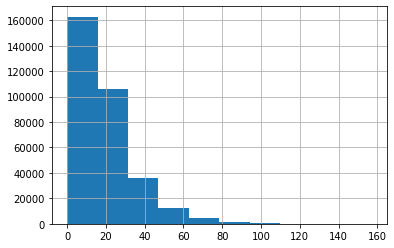

In [70]:
hist_score=restaurants["SCORE"].hist()

Granularity is important for distribution analysis and precision. It can be changed by varying the number if bins used for display.  The `hist()` function allows to pass multiple arguments, you can find more information if you follow this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)


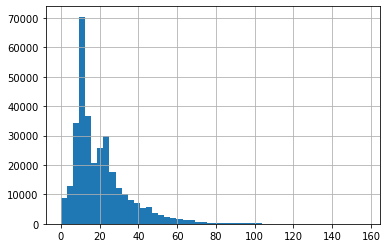

In [71]:
hist_score_2=restaurants["SCORE"].hist(bins = 50)

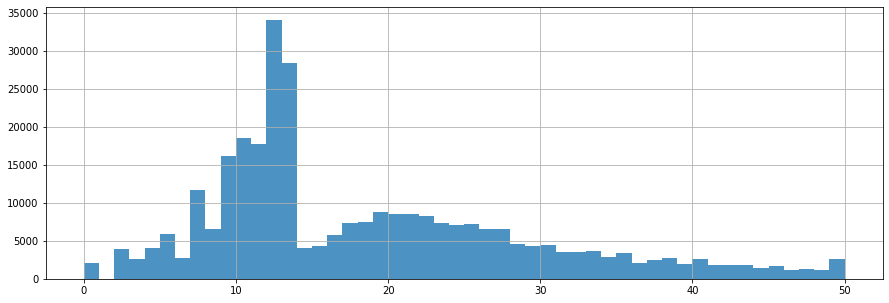

In [72]:
# A quick exposure to various options of the "hist" command 
hist_score_3=restaurants.SCORE.hist(bins=50, # use 50 bars
                          range=(0,50), # x-axis from 0 to 50
                          density=False,  # show normalized count (density=True), or raw counts (density= False)
                          figsize=(15,5), # controls the size of the plot
                          alpha = 0.8 # make the plot 20% transparent
                         )

We now have some statistical information for the SCORE column. Let's convert some other columns to a more useful type.

### <a class="anchor"></a> 1.2.2 Descriptive statistics for DATETIME variables


Remember that one of the dtypes handles Date and Time. Some of the columns in our DF contain this type of data, so let's convert these columns to the `datetime64` dtype so that we can further processings, statistics and distribution analysis for example.


In [73]:
restaurants["GRADE DATE"].head(10)

0           NaN
1           NaN
2    04/04/2019
3    02/14/2020
4    07/25/2017
5           NaN
6           NaN
7    06/06/2019
8    08/27/2018
9    03/27/2019
Name: GRADE DATE, dtype: object

For that, we need to understand first how to parse dates using the [Python conventions.](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) 

The relevant entries from the table are:

    %m Month as a zero-padded decimal number.
    %d Day of the month as a zero-padded decimal number.
    %Y Year with century as a decimal number.

Now that we know in what format the dates were entried (remember that americans write dates like this `month/day/year` , as opposed to `day/month/year`), we can convert our columns.

In [74]:
#We convert some columnd to the datetime64 tyoe
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

#Now we have another look at the dtaypes
restaurants.dtypes

CAMIS                             int64
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                         float64
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                        float64
Longitude                       float64
Community Board                 float64
Council District                float64
Census Tract                    float64
BIN                             float64
BBL                             float64


Let's see what the `.describe()` function can do now.

In [75]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe(datetime_is_numeric=True)

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,340600,168470,340600
mean,2017-12-10 02:41:24.613035264,2019-04-07 15:33:36.658158592,2022-03-09 00:00:00
min,1900-01-01 00:00:00,2013-06-07 00:00:00,2022-03-09 00:00:00
25%,2018-05-10 00:00:00,2018-05-22 00:00:00,2022-03-09 00:00:00
50%,2019-04-16 00:00:00,2019-04-17 00:00:00,2022-03-09 00:00:00
75%,2019-11-22 00:00:00,2019-11-14 00:00:00,2022-03-09 00:00:00
max,2022-03-08 00:00:00,2022-03-08 00:00:00,2022-03-09 00:00:00


We can also plot an histogram for datetime variables:

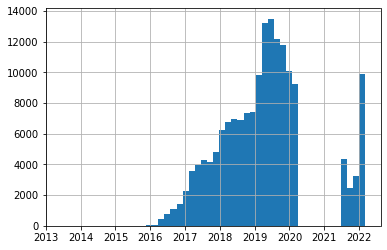

In [76]:
hist_date=restaurants["GRADE DATE"].hist(bins=50)


### <a class="anchor"></a> 1.2.3 Descriptive statistics for categorical variables

Now let's handle categorical data. This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).

We can use the pandas `.Categorical` function for this.

In [77]:
#We convert the categorical columns
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)

#We have another look at the dtypes
restaurants.dtypes

CAMIS                             int64
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                         float64
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                        float64
Longitude                       float64
Community Board                 float64
Council District                float64
Census Tract                    float64
BIN                             float64
BBL                             float64


In [78]:
restaurants.GRADE.value_counts()

A    134833
B     19861
C      8120
Name: GRADE, dtype: int64

In [79]:
#Display 10 first entries 
restaurants["DBA"].value_counts()[:10]

DUNKIN                                   3425
SUBWAY                                   2314
STARBUCKS                                1599
MCDONALD'S                               1558
KENNEDY FRIED CHICKEN                    1037
CROWN FRIED CHICKEN                       992
POPEYES                                   753
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     749
BURGER KING                               745
DUNKIN',' BASKIN ROBBINS                  570
Name: DBA, dtype: int64

An explanation:
 * The `value_counts()` function counts how many different values there are.
 * The `[:10]` filters the list, thus showing us only the first 10 values.  


 

In [80]:
#Display 5 first entries
restaurants["CUISINE DESCRIPTION"].value_counts()[:5].to_frame()

,CUISINE DESCRIPTION
American,64163
Chinese,34726
Pizza,21201
Coffee/Tea,16700
Latin American,15214


We can also plot the data, lets start by plotting the different categories of food with the `.plot()` function.

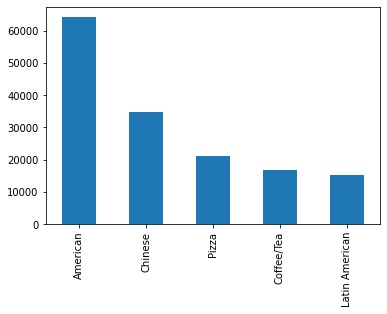

In [81]:
hist_cuisine=restaurants["CUISINE DESCRIPTION"].value_counts()[:5].plot(kind='bar')

In [82]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts().to_frame().rename(columns={"CUISINE DESCRIPTION": "Cuisine count"})
popular.head()

,Cuisine count
American,64163
Chinese,34726
Pizza,21201
Coffee/Tea,16700
Latin American,15214


If you have a look at the results of the last block of code, you will see that is seems to be quite detailed. We might for example want to treat "Cuban", "Dominican", "Puerto Rican", "South & Central American" just as "Latin American".

The `.replace()` function allows us to do this.

In [83]:
#Latin American food
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace=['Latin American (Central and South America)', 'Chilean'],
    value = 'Latin American',
    inplace=True
)

#Coffe bar
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='CafÃ©/Coffee/Tea',
    value = 'Cafe/Coffee/Tea',
    inplace=True
)

In [84]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts().to_frame().rename(columns={"CUISINE DESCRIPTION": "Cuisine count"})
popular.head()

,Cuisine count
American,64163
Chinese,34726
Pizza,21201
Coffee/Tea,16700
Latin American,15239


We can now plot the same barchart again, and see what the results are:



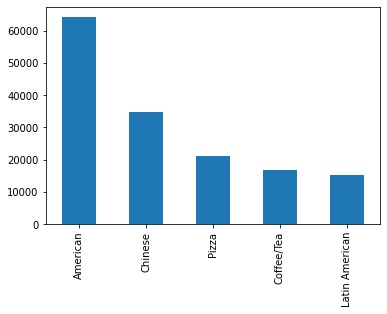

In [85]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
hist_pop=popular[:5].plot(kind='bar')

## <a class="anchor"></a> 1.3 Selecting Subsets




To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep

In [86]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice.head()

0    False
1    False
2    False
3    False
4    False
Name: VIOLATION CODE, dtype: bool

In [87]:
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called  has_mice

has_mice = restaurants[mice]
has_mice.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
8,41634340,JOE COFFEE,Manhattan,1045,LEXINGTON AVENUE,10021.0,2129882500,Coffee/Tea,2018-08-27,Violations were cited in the following area(s).,...,2022-03-09,Cycle Inspection / Initial Inspection,40.772066,-73.960990,108.0,4.0,12800.0,1043101.0,1.014090e+09,MN40
12,50069752,MACDOUGAL STREET ALEHOUSE,Manhattan,122,MACDOUGAL STREET,10012.0,2122540006,American,2017-10-23,Violations were cited in the following area(s).,...,2022-03-09,Pre-permit (Operational) / Initial Inspection,40.729853,-74.000592,102.0,1.0,6500.0,1008697.0,1.005400e+09,MN23
22,41370589,DELI & GRILL,Brooklyn,5001,4 AVENUE,11220.0,7187650080,Latin American,2019-03-12,Violations were cited in the following area(s).,...,2022-03-09,Cycle Inspection / Initial Inspection,40.646375,-74.012656,307.0,38.0,7800.0,3013242.0,3.007910e+09,BK32
23,41174549,CAFE Y ALGO MAS,Queens,9813,ASTORIA BOULEVARD,11369.0,7182050450,Bakery Products/Desserts,2019-06-05,Violations were cited in the following area(s).,...,2022-03-09,Cycle Inspection / Re-inspection,40.762295,-73.871128,403.0,21.0,36700.0,4543516.0,4.013720e+09,QN27
49,41654217,M&J NAVY YARD SUB SHOPPE,Brooklyn,2,ADELPHI STREET,11205.0,7185225150,Sandwiches,2018-03-22,Violations were cited in the following area(s).,...,2022-03-09,Cycle Inspection / Re-inspection,40.697656,-73.972758,302.0,35.0,21100.0,3057991.0,3.020310e+09,BK68


In [88]:
# List the most frequent DBA values in the data of restaurants that have mice
has_mice["DBA"].value_counts()[:20].to_frame().rename(columns={"DBA": "DBA count"})

,DBA count
SUBWAY,188
DUNKIN,109
CROWN FRIED CHICKEN,95
KENNEDY FRIED CHICKEN,90
MCDONALD'S,56
GOLDEN KRUST CARIBBEAN BAKERY & GRILL,55
POPEYES,50
STARBUCKS,49
BURGER KING,47
DOMINO'S,34


In [89]:
has_mice["CAMIS"].value_counts()[:5].to_frame().rename(columns={"CAMIS": "CAMIS count"})

,CAMIS count
50015263,13
50016943,13
41642251,12
50004065,11
50017015,11


And we can use more complex conditions.

In [90]:
#Restaurants in Brooklyn that have mices
mice_Brooklyn =  ( (restaurants["VIOLATION CODE"] == "04L") 
                    & (restaurants["BORO"] == "Brooklyn") )

has_mice_brooklyn = restaurants[mice_Brooklyn]
has_mice_brooklyn.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
22,41370589,DELI & GRILL,Brooklyn,5001,4 AVENUE,11220.0,7187650080,Latin American,2019-03-12,Violations were cited in the following area(s).,...,2022-03-09,Cycle Inspection / Initial Inspection,40.646375,-74.012656,307.0,38.0,7800.0,3013242.0,3.007910e+09,BK32
49,41654217,M&J NAVY YARD SUB SHOPPE,Brooklyn,2,ADELPHI STREET,11205.0,7185225150,Sandwiches,2018-03-22,Violations were cited in the following area(s).,...,2022-03-09,Cycle Inspection / Re-inspection,40.697656,-73.972758,302.0,35.0,21100.0,3057991.0,3.020310e+09,BK68
108,50086382,IL POSTO,Brooklyn,7409,AVENUE U,11234.0,7182414317,Italian,2019-07-31,Violations were cited in the following area(s).,...,2022-03-09,Cycle Inspection / Re-inspection,40.621321,-73.905154,318.0,46.0,69602.0,3237484.0,3.084150e+09,BK45
135,50082407,GRANDMA'S ORIGINAL PIZZERIA,Brooklyn,6918,3 AVENUE,11209.0,7188334646,Pizza,2019-12-16,Violations were cited in the following area(s).,...,2022-03-09,Cycle Inspection / Initial Inspection,40.635492,-74.026143,310.0,43.0,6800.0,3145626.0,3.058710e+09,BK31
196,41668418,PROGRESO HONDURAS RESTAURANT,Brooklyn,5303,FT HAMILTON PARKWAY,11219.0,3475336908,Spanish,2019-09-11,Violations were cited in the following area(s).,...,2022-03-09,Cycle Inspection / Initial Inspection,40.636363,-74.000638,312.0,44.0,21800.0,3138862.0,3.056670e+09,BK88


In [91]:
has_mice_brooklyn["DBA"].value_counts()[:20].to_frame().rename(columns={"DBA": "DBA count"})

,DBA count
CROWN FRIED CHICKEN,49
KENNEDY FRIED CHICKEN,20
GOLDEN KRUST CARIBBEAN BAKERY & GRILL,17
SUBWAY,17
BURGER KING,15
PAPA JOHN'S,15
DUNKIN,14
RINCONCITO FAMILIAR MEXICAN CUISINE,11
EL POLLO III,10
FAMILY ALTAGRACIA CARIBBEAN CUISINE,10


## <a class="anchor"></a> 1.3 Exercice


In [92]:
# Use the .head() function on the "VIOLATION CODE" column
#restaurants["Your code here"]."Your code here"

In [93]:
#Use the .value_counts() function to count the number of occurences by violation code
#violation_counts = "Your code here"."Your code here"

In [94]:
#Have a look at the first 10 values
#violation_counts["Your code here" : "Your code here"]

In [95]:
#Plot the 20 violation codes ocurring the most
#"Your code here".plot(kind = 'bar')

## <a class="anchor"></a> 1.4 Missing data

Let's have a look at our missing data. We will write a function which counts the number of missing values per column, and then calculates the percentage of the total values that the missing values represent.


In [96]:
#We store this code as a function in order to use it again later on
def missing_values_calculation():

  #We store the number of missing values for every column
  total = restaurants.isnull().sum().sort_values(ascending=False)

  #We make a new column contaning the percentage of missing values 
  #out of the total number of values
  percent = (restaurants.isnull().sum()/restaurants.isnull().count()).sort_values(ascending=False)

  #We now make a DF containing these 2 values
  missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

  #And we print the DataFrame
  display(missing)

#We call the function
missing_values_calculation()

,Total,Percent
GRADE,177786,0.521979
GRADE DATE,172130,0.505373
SCORE,15688,0.046060
VIOLATION CODE,7773,0.022821
BIN,7630,0.022402
Community Board,6079,0.017848
NTA,6079,0.017848
Census Tract,6071,0.017824
Council District,6071,0.017824
VIOLATION DESCRIPTION,5711,0.016767


### <a class="anchor"></a> 1.4.1 Dropping columns


The GRADE and GRADE DATE columns containt a lot of missing values (more than half the data is missing). 
We may want to drop these 2 columns as the missing data is too much. We can use the `.drop()` function for this, but we need to pass an additional argument to tell Pandas we want to drop a column and not a row. This argument is: `axis = 1`. 

Try with and without the argument `inplace=True` and check whether the chage was implemented in the restaurants dataframe or only on a copy.

In [97]:
restaurants.drop(["GRADE", 'GRADE DATE'], axis = 1, inplace=True)

As you can see, the "GRADE" and "GRADE DATE" columns are not a part of our DataFrame anymore.

### <a class="anchor"></a> 1.4.2 Fillna() and dropna()


For the remaining columns we may want to do three different things:
 * Replace the missing entries with a specific value
 * Either estimate a possible value using the median for example
 * Drop the row altogether.

 Remember that we can drop rows with `dropna()`. Another useful function is `fillna()`, this function allows us to replace missing values with a value we may want.

In [98]:
# Replacing missing values with a given value
#In this case we are going to assume that if the value is missing then there was no critical flag
restaurants['Community Board'].fillna("N", inplace = True)

# Replacing missing values with an estimation (median)
median = restaurants['SCORE'].median()
restaurants['SCORE'].fillna(median, inplace=True)

#Dropping the row, you should already know this one
restaurants.dropna(subset=['VIOLATION DESCRIPTION'], inplace=True)

#Let's see how many 
missing_values_calculation()



,Total,Percent
BIN,7343,0.021927
NTA,5862,0.017504
Census Tract,5854,0.017480
Council District,5854,0.017480
ZIPCODE,5076,0.015157
VIOLATION CODE,2062,0.006157
BBL,786,0.002347
BUILDING,563,0.001681
Longitude,268,0.000800
Latitude,268,0.000800


# <a class="anchor"></a> 2 Boxplots and correlations

We will now change datasets. This dataset containts the compensation of the CEO's of different companies.


In [99]:
#Run this cell
url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/CEO%20compensation.csv"
data = pd.read_csv(url) 
data.head(3) #only shows the first 3 rows

,Total Comp,Top 20,Wide Industry,Company,CEO,City of Birth,State of Birth,Age,Undergrad,UG Degree,...,Bonus,other,St_gains,Comp for 5 yrs,Stock owned,Sales,Profits,Return over 5 yrs,Industry,Industry Code
0,203020000.0,True,Travel,Walt Disney,Mr. Michael D Eisner,New York,NY,52,Denison U,BA,...,NaN,9667.0,202261000.0,236771000.0,0.561,8865,779.5,17.0,Travel-hotelsrecreation,8
1,53110900.0,True,Financial,Travelers,Mr. Sanford I Weill,New York,NY,61,Cornell,BA,...,3030310.0,2161890.0,46900000.0,141605000.0,1.168,6797,950.0,28.0,Financial services-leasefinance,1
2,38675400.0,True,Insurance,Conseco,Mr. Stephen C Hilbert,Terre Haute,IN,48,NaN,NaN,...,8287670.0,190570.0,29947100.0,51156100.0,2.842,2637,308.9,76.0,Insurance-lifehealth,4


In [100]:
# Run this cell to drop the rows where there are missing values
data.dropna(inplace=True)

## <a class="anchor"></a> 2.1 Boxplots

Pandas allows you to plot boxplots with your data. If you do not remember what a Boxplot is you can refresh your memory following this link. Essentially they allow to see the following elements:

* Minimum
* Maximum
* Median
* Quartiles
* Outliers

We will use the `.boxplot()` function to see how much the salaries and bonuses of CEO's can vary. What part of CEO's compensation can vary the most, which one varies the least? Which one has the biggest outliers?



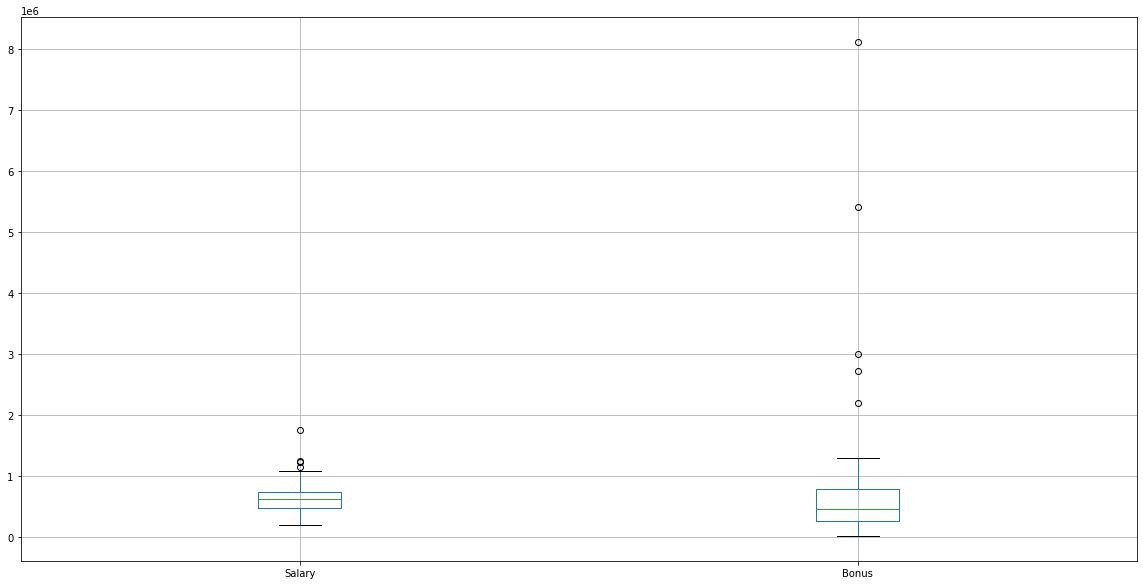

In [101]:
#Boxplot for salaries and bonuses
box_plot=data.boxplot(column = ["Salary", "Bonus"], figsize = (20,10))


### <a class="anchor"></a> 2.1.2 Boxplot exercice

Use the .boxplot function with the "Bonus" column. What is the mean, median, max, min and what are the outlier values?

Subsequentially check your answers using the .describe() function.


In [102]:
#Generate the Boxplot

In [103]:
#Check your answers

## <a class="anchor"></a> 2.1 Scatterplots and Correlation

This plots are useful to find correlations between variables. Let's see if we can find any correlation (visually) between the Age and the Salary of the CEO's.


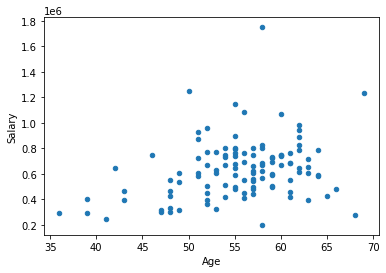

In [104]:
scat = data.plot.scatter(x = "Age", y = "Salary")

Pandas also includes a function `corr` which allows to easily calculate [Pearsons r coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

In [105]:
data["Age"].corr(data["Salary"])

0.30571805690619325

The correlation seems quite low, so let's see what else we can find.

Usually, as a way to inentivize managers to do a good job, they are given stocks or options. This way, they have an intrinsic motivation to make the stock price grow, as they can benefit enormously from this. Let's see if we can find a correlation between the stock owned by a CEO and the return of the stock in the last 5 years.

Pearson's r coefficient is: 0.66


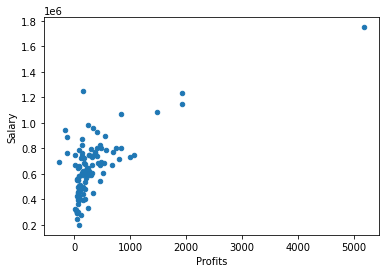

In [106]:
#Scatterplot
profit_cat= data.plot.scatter(x="Profits", y="Salary")
#Pearson's r coefficient
print("Pearson's r coefficient is: {}".format(round(data["Profits"].corr(data["Salary"]), 2)))


There seems to be a correlation between the fixed part of a CEO's  compensation and the companies profit, but always remember that correlation does not imply causation.

You can also include a third variable if you want to. In order to plot 3-different variables in 2 dimensions we can use the seaborn library and change the collor of the third variable. This is done with the `hue` argument.

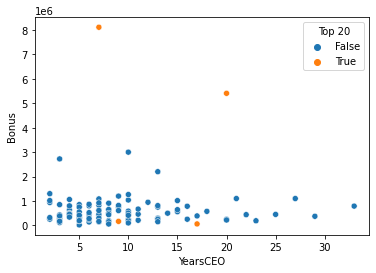

In [107]:
scat2=sns.scatterplot(x=data["YearsCEO"], y=data["Bonus"],hue=data["Top 20"])

## <a class="anchor"></a> 2.2 Exercice

1) Load the dataset from the following url: `https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/Birthweight.csv`, set ID as the index column and use the .head() funtion to obtain an overview.

In [108]:
birth_data = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/Birthweight.csv")
birth_data.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


2) The above dataset contains information about newborn babis and their mothers. Plot an histogram of the "Gestation" column. What is the mode and the mean of the gestation period?

3) Plot a boxplot of the gestation period. Were you right about the mode and the median?

4) It might be interesting to see whether there is a correlation between smoker/ non-smoker mothers and the babies birthweight.

Plot a scatterplot between the "smoker", "Birthweight" and "mage" columns.

In [109]:
#Check the correlation between each pair of variables

## <a class="anchor"></a> 2.3 Pairgrids and heatmaps

Pairgrids can be a usefool tool to visualize correlations. They allow us to plot the relationships of multiple variables against each other, 2 at a time.


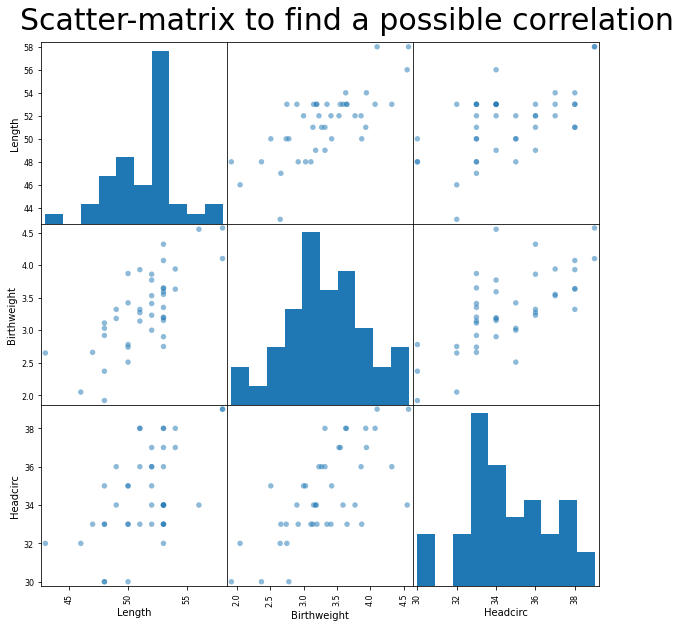

In [110]:
scat3 = scatter_matrix(birth_data[["Length", "Birthweight", "Headcirc"]], figsize=(10, 10), grid=True, s = 120)
plt.suptitle('Scatter-matrix to find a possible correlation', size = 30, y = 0.93, x =0.55)
plt.show()


Another more useful tools are [heatmaps](https://en.wikipedia.org/wiki/Heat_map). By first calculating the correlations between every variable, we can then plot a heatmap of those.


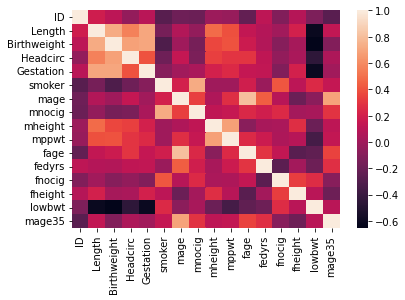

In [111]:
correlations = birth_data.corr()
heatmap=sns.heatmap(correlations)